# цели и задачи проекта:
провести разведывательный анализ данных и составьте отчёт по его результатам

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind, mannwhitneyu, friedmanchisquare

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

%matplotlib inline

stud = pd.read_csv('stud_math.csv')

In [181]:
def test_means(feature, values, test_name=mannwhitneyu, p=0.05):
    '''
       Функция сравнивает средние значения двух выборок с помощью критерия Стьюдента и 
       критерия Манна-Уитни, на вход функция принимает:
       feature - название признака из датаврейма, для которого сортируются 2 выборки
       values - список из 2-х значений признака
       test_name - какой применяется тест mannwhitneyu или ttest_ind
       p - значение p-value
    ''' 
    data1 = stud[stud[feature] == values[0]]['score'].values
    data2 = stud[stud[feature] == values[1]]['score'].values

    stat, p = test_name(data1, data2) # Расчёт статистики и p-значения
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    alpha = 0.05 # Я выбрал альфа 0,05
    if p > alpha:
        print('Такое же распределение (нельзя отклонить H0)')
    else:
        print('Различное распределение (отклонить H0)')

In [182]:
stud.head() # Посмотрим первые 5 строк датасета

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

## Датасет содержит: 
350 строк (наблюдений), 30 столбцов (признаков) из них 1 зависимая переменная, предсказываемая велечина 'score' (баллы по госэкзамену по математике)
В Датасете: 17 номинотвных признаков, 3 числовых и 9 - котегориальных


In [185]:
'''
   Рассмотрим каждый признак поодному.
   Для начала рассмотрим зависимую переменную score
'''

'\n   Рассмотрим каждый признак поодному.\n   Для начала рассмотрим зависимую переменную score\n'

<AxesSubplot:>

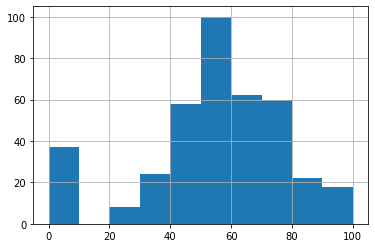

In [186]:
stud.score.hist()

In [187]:
stud.score.value_counts(dropna=False)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [ ]:
'''Распределение похоже на нормальное ,но есть пропущенные значение, заменим их на моду'''

In [188]:
stud.score.fillna(stud.score.median(), inplace=True)

In [189]:
stud.score.value_counts(dropna=False).sort_values()

20.0      1
100.0     1
95.0      5
85.0      6
25.0      7
35.0      9
90.0     12
30.0     15
80.0     16
45.0     27
70.0     27
60.0     31
40.0     31
65.0     31
75.0     33
0.0      37
55.0     52
50.0     54
Name: score, dtype: int64

# 1. school
— аббревиатура школы, в которой учится ученик

In [8]:
stud['school'].value_counts(dropna=False) # посмотрим значения которые принимает переменная

GP    349
MS     46
Name: school, dtype: int64

        median       mean  count        std         var
school                                                 
GP        55.0  52.664756    349  22.951835  526.786714
MS        50.0  49.565217     46  21.156194  447.584541


<AxesSubplot:xlabel='school', ylabel='score'>

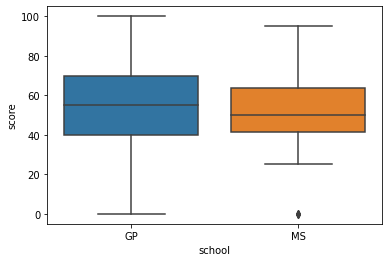

In [192]:
print(stud.groupby(['school'])['score'].agg(['median', 'mean', 'count', 'std', 'var'])) # основные ститистики для каждой школы
sns.boxplot(x="school", y="score",  # бокс-плот на котором видно как распределяются оценки за экзамен по этим выборкам
            data=stud)

In [ ]:
'''
   Видно что средние значения оценки за экзамен учеников 2-х школ примерно равны, проверим это ститистичиски
   т.к. дисперсии в обоих выборка различны, то примении тест Манна-Уитни  
'''

In [193]:
test_means('school', ['GP', 'MS'])

Statistics=7147.500, p=0.113
Такое же распределение (нельзя отклонить H0)


In [138]:
'''Критерий имеет 2 униакльных значения, пропусков нет, - можно удалить так как среднее и распределения балов за 
экзамен статистически равны'''

'Критерий имеет 2 униакльных значения, пропусков нет, - можно удалить так как среднее и распределения балов за \nэкзамен статистически равны'

In [194]:
stud.drop(['school'], inplace = True, axis = 1)

# 2. sex
— пол ученика ('F' - женский, 'M' - мужской)

In [196]:
stud['sex'].value_counts(dropna=False) # Признак имеет 2 значения, пропущенных значений нет

F    208
M    187
Name: sex, dtype: int64

     median       mean  count        std         var
sex                                                 
F      55.0  50.192308    208  22.856653  522.426607
M      55.0  54.652406    187  22.450951  504.045196


     median       mean  count        std         var
sex                                                 
F      55.0  50.192308    208  22.856653  522.426607
M      55.0  54.652406    187  22.450951  504.045196


<AxesSubplot:xlabel='sex', ylabel='score'>

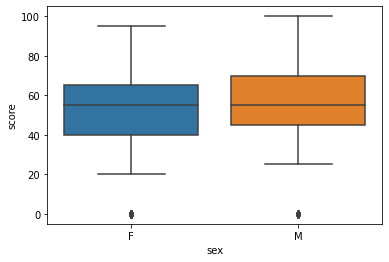

In [197]:
print(stud.groupby(['sex'])['score'].agg(['median', 'mean', 'count', 'std', 'var'])) # основные ститистики для этого признака
sns.boxplot(x="sex", y="score", # бокс-плот на котором видно как распределяются оценки за экзамен по этим выборкам
            data=stud)

In [198]:
'''
   Возможно этот признак тоже делит данные на равные группы, проверим статистическим тестом Манна-Уитни
'''

test_means('sex', ['F', 'M'])

Statistics=17237.500, p=0.025
Различное распределение (отклонить H0)


In [199]:
'''
   Критерий имеет 2 униакльных значения, пропусков нет, выборки статистически отличаются, оставим переменную
   для построения модели 
'''

'\n   Критерий имеет 2 униакльных значения, пропусков нет, выборки статистически отличаются, оставим переменную\n   для построения модели \n'

# 3. age
 — возраст ученика (от 15 до 22)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

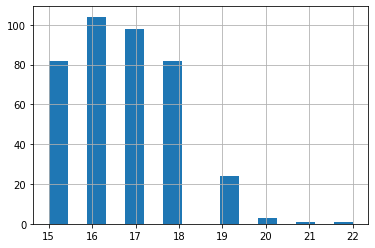

In [200]:
stud.age.hist(bins=16)
stud.age.describe()
stud.age.value_counts()

In [201]:
'''
   количественный признак, пропусков нет, значения 20-21 можно удалть как выбросы, так как таких учеников всего 5
'''

'\n   количественный признак, пропусков нет, значения 20-21 можно удалть как выбросы, так как таких учеников всего 5\n'

In [202]:
stud = stud[stud.age < 20]

16    104
17     98
18     82
15     82
19     24
Name: age, dtype: int64

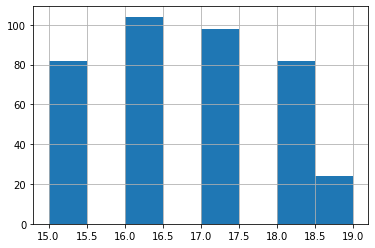

In [203]:
stud.age.hist(bins=8)
stud.age.describe()
stud.age.value_counts()

In [204]:
len(stud.index) # пока ничего не потерял

390

# 4.address
— тип адреса ученика ('U' - городской, 'R' - за городом)

In [205]:
stud.address.value_counts(dropna=False)

U      292
R       82
NaN     16
Name: address, dtype: int64

In [206]:
'''номинальный бинарный признак, есть пропущенные значения, их можно заменить модой'''

'номинальный бинарный признак, есть пропущенные значения, их можно заменить модой'

In [207]:
stud.address.fillna(stud.address.mode()[0], inplace=True)

         median       mean  count        std         var
address                                                 
R          50.0  47.073171     82  23.253185  540.710629
U          55.0  53.620130    308  22.457963  504.360115


<AxesSubplot:xlabel='address', ylabel='score'>

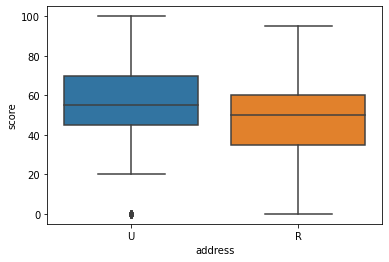

In [209]:
print(stud.groupby(['address'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="address", y="score",  # бокс-плот на котором видно как распределяются оценки за экзамен по этим выборкам
            data=stud)

In [210]:
test_means('address', ['R', 'U'])

Statistics=10286.000, p=0.005
Различное распределение (отклонить H0)


In [211]:
'''На всякий случай применим тест Стьюдента'''
test_means('address', ['R', 'U'], ttest_ind)

Statistics=-2.329, p=0.020
Различное распределение (отклонить H0)


In [212]:
'''Признак стоит оставить так как есть ститистическое различие'''

'Признак стоит оставить так как есть ститистическое различие'

# 5. famsize
— размер семьи('LE3' <= 3, 'GT3' >3)

In [213]:
stud.famsize.value_counts(dropna=False)

GT3    257
LE3    106
NaN     27
Name: famsize, dtype: int64

In [214]:
'''номинальный бинарный признак, есть пропущенные значения, их можно заменить модой'''

'номинальный бинарный признак, есть пропущенные значения, их можно заменить модой'

In [215]:
stud.famsize.fillna(stud.famsize.mode()[0], inplace=True)

         median       mean  count        std         var
famsize                                                 
GT3        55.0  51.302817    284  23.192081  537.872642
LE3        55.0  54.764151    106  21.440750  459.705750


<AxesSubplot:xlabel='famsize', ylabel='score'>

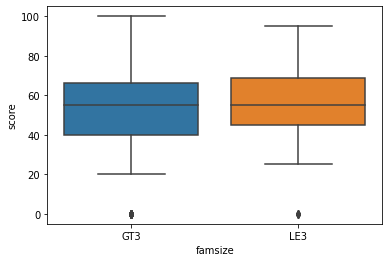

In [216]:
print(stud.groupby(['famsize'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="famsize", y="score", # бокс-плот на котором видно как распределяются оценки за экзамен по этим выборкам
            data=stud)

In [217]:
'''
    Для проверки гипотезы о статистическом сходстве 2-х выборок применим тест Манна-Уитни
    H0 - выборки равны
'''
test_means('famsize', ['GT3', 'LE3'])

Statistics=13955.000, p=0.133
Такое же распределение (нельзя отклонить H0)


In [59]:
'''номинальный бинарный признак, который можно удалить т.к. выборки схожи, что подтвердил U-test'''

'номинальный бинарный признак, который можно удалить т.к. выборки схожи, что подтвердил U-test'

In [218]:
stud.drop(['famsize'], inplace = True, axis = 1)

# 6. pstatus
— статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [219]:
stud.Pstatus.value_counts(dropna=False)

T      311
NaN     45
A       34
Name: Pstatus, dtype: int64

In [ ]:
'''номинальный бинарный признак, есть пропущенные значения, их можно заменить модой'''

In [220]:
stud.Pstatus.fillna(stud.Pstatus.mode()[0], inplace=True)

         median       mean  count        std         var
Pstatus                                                 
A          55.0  54.411765     34  22.079907  487.522282
T          55.0  52.036517    356  22.837363  521.545142


<AxesSubplot:xlabel='Pstatus', ylabel='score'>

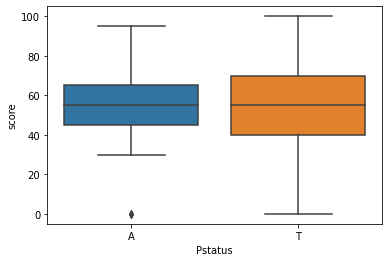

In [221]:
print(stud.groupby(['Pstatus'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="Pstatus", y="score",  # бокс-плот на котором видно как распределяются оценки за экзамен по этим выборкам
            data=stud)

In [222]:
'''
    Для проверки гипотезы о статистическом сходстве 2-х выборок применим тест Манна-Уитни
    H0 - выборки равны
'''
test_means('Pstatus', ['T', 'A'])

Statistics=5839.500, p=0.367
Такое же распределение (нельзя отклонить H0)


In [29]:
'''номинальный бинарный признак, который можно удалить т.к. выборки равноы согласно U-тесту'''

'номинальный бинарный признак, есть пропущенные значения'

In [223]:
stud.drop(['Pstatus'], inplace = True, axis = 1)

# 7. Medu
— образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [224]:
stud.Medu.value_counts(dropna=False)

4.0    130
2.0    101
3.0     95
1.0     58
0.0      3
NaN      3
Name: Medu, dtype: int64

In [ ]:
'''Так как пропущенных значения всего 3, заменим их на моду'''

In [225]:
stud.Medu.fillna(stud.Medu.mode()[0], inplace=True)

      median       mean  count        std
Medu                                     
0.0     75.0  65.000000      3  17.320508
1.0     50.0  43.879310     58  22.065356
2.0     55.0  49.752475    101  22.364886
3.0     55.0  51.578947     95  23.123893
4.0     60.0  57.969925    133  21.881547


<AxesSubplot:xlabel='Medu', ylabel='score'>

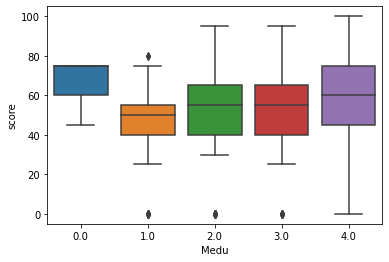

In [226]:
print(stud.groupby(['Medu'])['score'].agg(['median', 'mean', 'count', 'std']))
sns.boxplot(x="Medu", y="score", # бокс-плот на котором видно как распределяются оценки за экзамен по этим выборкам 
            data=stud)

In [49]:
'''котегорильный признак, есть пропущенные значения, похоже есть взаимосвязь с зависимой переменной score 
   значения 2 и 3 можно объединить
'''

'котегорильный признак, есть пропущенные значения, похоже есть взаимосвязь с зависимой переменной score \n   значения 2 и 3 можно объединить\n'

# 8. Fedu 
— образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [227]:
stud.Fedu.value_counts(dropna=False)

2.0     103
3.0      96
4.0      88
1.0      76
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [ ]:
'''
    В данных по этому признаку есть пропущенные значения, а также одно значение с ошибкой "40", его можно
    заменить на "4", т.к. здравый смысл подсказывает что это 4. Остальные заменим случайными значениями от 0
    до 4
'''

In [228]:
stud.Fedu[stud.Fedu == 40] = 4
stud.Fedu = stud.Fedu.apply(lambda x:np.random.randint(0, 5) if x not in range(5) else x)

<ipython-input-228-3f707c11e58b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.Fedu[stud.Fedu == 40] = 4


In [229]:
test.value_counts(dropna=False)

2.0    108
3.0    103
4.0     92
1.0     82
0.0      5
Name: Fedu, dtype: int64

      median       mean  count        std
Fedu                                     
0.0     57.5  59.375000      8  13.211872
1.0     50.0  46.097561     82  23.491848
2.0     55.0  51.262136    103  22.984633
3.0     55.0  53.640777    103  21.018131
4.0     60.0  56.542553     94  23.417972


<AxesSubplot:xlabel='Fedu', ylabel='score'>

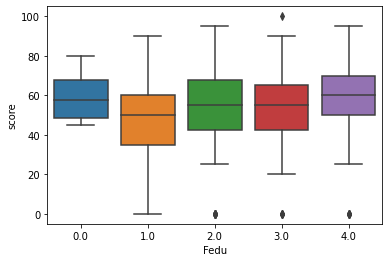

In [230]:
print(stud.groupby(['Fedu'])['score'].agg(['median', 'mean', 'count', 'std']))
sns.boxplot(x="Fedu", y="score", 
            data=stud)

In [35]:
'''котегорильный признак, похоже есть взаимосвязь с баллом за экзамен по математике(score)'''

'котегорильный признак, есть пропущенные значения'

# 9. Mjob 
— работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [231]:
stud.Mjob.value_counts(dropna=False)

other       132
services     95
at_home      58
teacher      55
health       31
NaN          19
Name: Mjob, dtype: int64

In [ ]:
'''
    В данных по этому признаку есть пропущенные значения, их можно заменить на моду
'''

In [232]:
stud.Mjob.fillna(stud.Mjob.mode()[0], inplace=True)

          median       mean  count        std
Mjob                                         
at_home     50.0  45.689655     58  23.868210
health      65.0  60.161290     31  21.774751
other       55.0  50.562914    151  21.836842
services    55.0  54.631579     95  23.077599
teacher     55.0  55.181818     55  22.463213


<AxesSubplot:xlabel='Mjob', ylabel='score'>

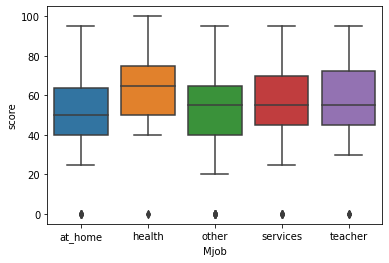

In [233]:
print(stud.groupby(['Mjob'])['score'].agg(['median', 'mean', 'count', 'std']))
sns.boxplot(x="Mjob", y="score", # бокс-плот на котором видно как распределяются оценки за экзамен по этим выборкам 
            data=stud)

In [ ]:
'''котегорильный признак, значения services и teacher можно объединить'''

# 10 Fjob 
— работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [234]:
stud.Fjob.value_counts(dropna=False)

other       194
services    100
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [ ]:
'''
    В данных по этому признаку есть пропущенные значения, их можно заменить на моду
'''

In [235]:
stud.Fjob.fillna(stud.Fjob.mode()[0], inplace=True)

          median       mean  count        std         var
Fjob                                                     
at_home     55.0  51.875000     16  25.876308  669.583333
health      55.0  55.666667     15  14.984119  224.523810
other       55.0  51.739130    230  22.805840  520.106322
services    55.0  50.750000    100  21.536614  463.825758
teacher     70.0  59.827586     29  27.434427  752.647783


<AxesSubplot:xlabel='Fjob', ylabel='score'>

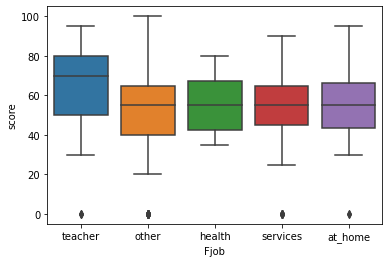

In [236]:
print(stud.groupby(['Fjob'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="Fjob", y="score", 
            data=stud)

In [ ]:
'''
   Номинативный признак, распределение оценки у группы 'teacher' отличается от других групп, 
   можно сдлеть бинарный признак teacher или нет
'''

In [237]:
stud['F_isteacher'] = stud.Fjob.apply(lambda x: 1 if x == 'teacher' else 0) # создаю новый признак
stud.drop(['Fjob'], inplace = True, axis = 1) # Удаляю старый признак


In [238]:
stud.head()

,sex,age,address,Medu,Fedu,Mjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,F_isteacher
0,F,18,U,4.0,4.0,at_home,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0,1
1,F,17,U,1.0,1.0,at_home,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,0
2,F,15,U,1.0,1.0,at_home,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0,0
3,F,15,U,4.0,2.0,health,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,0
4,F,16,U,3.0,3.0,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0,0


# 11 reason — 
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [239]:
stud.reason.value_counts(dropna=False)

course        133
home          104
reputation    103
other          33
NaN            17
Name: reason, dtype: int64

In [ ]:
'''
    Номинативный признак, пропущенные значения можно заменить на моду
'''

In [240]:
stud.reason.fillna(stud.reason.mode()[0], inplace=True)

            median       mean  count        std         var
reason                                                     
course        55.0  49.666667    150  23.528268  553.579418
home          55.0  51.298077    104  23.524364  553.395724
other         55.0  56.363636     33  19.456391  378.551136
reputation    55.0  55.631068    103  21.462229  460.627261


<AxesSubplot:xlabel='reason', ylabel='score'>

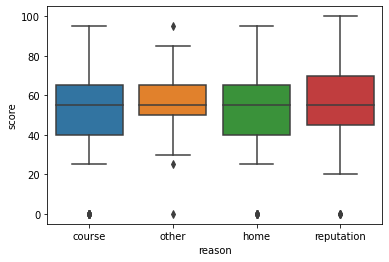

In [241]:
print(stud.groupby(['reason'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="reason", y="score", # бокс-плот на котором видно как распределяются оценки за экзамен по этим выборкам
            data=stud)

In [ ]:
'''Медианные значения равны, а средние очень близки проверим статистически на равенство с помощью
   критерия Манна-Уитни
'''

In [243]:
for i in combinations(stud.reason.unique(), 2):
    test_means('reason', [i[0], i[1]], p=0.01)

Statistics=2121.000, p=0.099
Такое же распределение (нельзя отклонить H0)
Statistics=7455.500, p=0.274
Такое же распределение (нельзя отклонить H0)
Statistics=6634.000, p=0.028
Различное распределение (отклонить H0)
Statistics=1565.500, p=0.224
Такое же распределение (нельзя отклонить H0)
Statistics=1688.500, p=0.479
Такое же распределение (нельзя отклонить H0)
Statistics=4846.000, p=0.117
Такое же распределение (нельзя отклонить H0)


In [ ]:
stud.drop(['reason'], inplace = True, axis = 1)

# 12 guardian 
— опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [246]:
stud.guardian.value_counts(dropna=False)

mother    249
father     86
NaN        28
other      27
Name: guardian, dtype: int64

In [ ]:
'''Номинативная переменная, есть пропущенные значения, для этого признака в таблице предусмотренно неопределённое
   значение 'other' поэтому пропущенные значения можно замениить на него
'''

In [247]:
stud.guardian.fillna('other', inplace=True)

          median       mean  count        std         var
guardian                                                 
father      55.0  53.430233     86  22.664583  513.683311
mother      55.0  52.670683    249  23.404662  547.778210
other       55.0  48.454545     55  19.693784  387.845118


<AxesSubplot:xlabel='guardian', ylabel='score'>

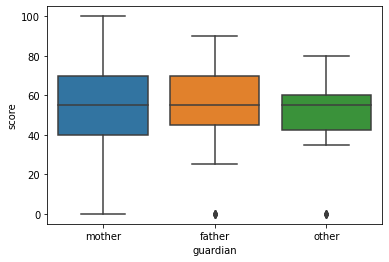

In [248]:
print(stud.groupby(['guardian'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="guardian", y="score", 
            data=stud)

# 13 traveltime
— время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [249]:
stud.traveltime.value_counts(dropna=False)

1.0    238
2.0     95
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [ ]:
'''
    Категориальный признак, пропущенные значения можно заменить случайным образом
'''

In [250]:
stud.traveltime = stud.traveltime.apply(lambda x:np.random.randint(1, 5) if x not in range(5) else x)

In [251]:
stud.traveltime.value_counts(dropna=False)

1.0    248
2.0    102
3.0     27
4.0     13
Name: traveltime, dtype: int64

            median       mean  count        std         var
traveltime                                                 
1.0           55.0  53.266129    248  22.702479  515.402573
2.0           52.5  50.784314    102  22.676645  514.230247
3.0           55.0  51.296296     27  26.186924  685.754986
4.0           50.0  46.153846     13  16.727453  279.807692


<AxesSubplot:xlabel='traveltime', ylabel='score'>

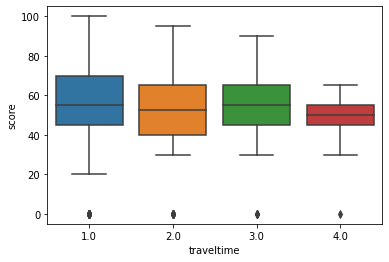

In [252]:
print(stud.groupby(['traveltime'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="traveltime", y="score", 
            data=stud)

In [ ]:
'''
   В среднем у тех кто ближе живёт к школе бал за экзамен по математике выше
'''

# 14 studytime 
— время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [253]:
stud.studytime.value_counts(dropna=False)

2.0    193
1.0    100
3.0     63
4.0     27
NaN      7
Name: studytime, dtype: int64

In [ ]:
'''
    Категориальный признак, пропущенные значения можно заменить на моду
'''

In [254]:
stud.studytime.fillna(stud.studytime.mode()[0], inplace=True)

           median       mean  count        std         var
studytime                                                 
1.0          50.0  49.300000    100  24.350347  592.939394
2.0          55.0  51.525000    200  21.344256  455.577261
3.0          55.0  57.460317     63  22.286134  496.671787
4.0          60.0  56.296296     27  26.406315  697.293447


<AxesSubplot:xlabel='studytime', ylabel='score'>

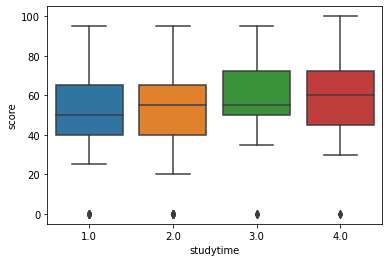

In [255]:
print(stud.groupby(['studytime'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="studytime", y="score", 
            data=stud)

In [ ]:
'''
    Бал за математику в среднем выше у тех кто больше тратит время на учёбу вне школы
'''

# 15 failures
— количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [256]:
stud.failures.value_counts(dropna=False)

0.0    292
1.0     49
NaN     22
2.0     14
3.0     13
Name: failures, dtype: int64

In [ ]:
'''
    Категориальный признак, пропущенные значения можно заменить на моду, т.к. она здесь очень силно выражена
'''

In [257]:
stud.failures.fillna(stud.failures.mode()[0], inplace=True)

          median       mean  count        std         var
failures                                                 
0.0         55.0  56.003185    314  20.929594  438.047913
1.0         45.0  40.306122     49  23.704082  561.883503
2.0         37.5  30.000000     14  22.617216  511.538462
3.0         35.0  30.384615     13  22.588856  510.256410


<AxesSubplot:xlabel='failures', ylabel='score'>

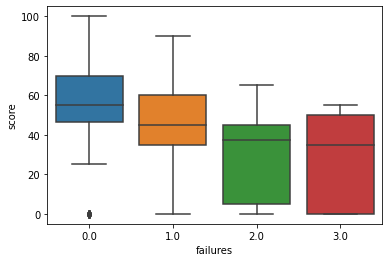

In [258]:
print(stud.groupby(['failures'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="failures", y="score", 
            data=stud)

In [259]:
'''
   Похоже что чем меньше внеучебных неудач, тем лучше учится ученик по математике
'''

'\n   Похоже что чем меньше внеучебных неудач, тем лучше учится ученик по математике\n'

# 16 schoolsup
— дополнительная образовательная поддержка (yes или no)

In [260]:
stud.schoolsup.value_counts(dropna=False)

no     331
yes     51
NaN      8
Name: schoolsup, dtype: int64

In [ ]:
'''номинальный бинарный признак, есть пропущенные значения, их можно заменить модой'''

In [261]:
stud.schoolsup.fillna(stud.schoolsup.mode()[0], inplace=True)

           median       mean  count        std         var
schoolsup                                                 
no           55.0  52.979351    339  23.686866  561.067620
yes          50.0  47.352941     51  14.399755  207.352941


<AxesSubplot:xlabel='schoolsup', ylabel='score'>

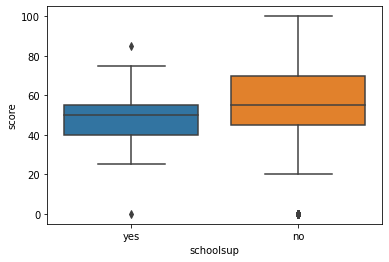

In [262]:
print(stud.groupby(['schoolsup'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="schoolsup", y="score", 
            data=stud)

In [ ]:
'''Визуально видно различие в успеваемости двух групп''

# 17 famsup
— семейная образовательная поддержка (yes или no)

In [263]:
stud.famsup.value_counts(dropna=False)

yes    217
no     134
NaN     39
Name: famsup, dtype: int64

In [ ]:
'''номинальный бинарный признак, есть пропущенные значения, их можно заменить на моду'''

In [264]:
stud.famsup.fillna(stud.famsup.mode()[0], inplace=True)

        median       mean  count        std         var
famsup                                                 
no        55.0  52.052239    134  23.795911  566.245371
yes       55.0  52.343750    256  22.237025  494.485294


<AxesSubplot:xlabel='famsup', ylabel='score'>

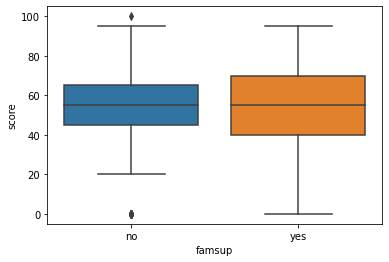

In [265]:
print(stud.groupby(['famsup'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="famsup", y="score", 
            data=stud)

In [ ]:
'''средние значения очень близки друг к другу, проверим статистическим тестом'''

In [266]:
'''
    Для проверки гипотезы о статистическом сходстве 2-х выборок применим тест Стьюдента,
    т.к. дисперсии тоже близки
'''
test_means('famsup', ['yes', 'no'], ttest_ind)

Statistics=0.120, p=0.905
Такое же распределение (нельзя отклонить H0)


In [ ]:
'''удалим признак'''

In [267]:
stud.drop(['famsup'], inplace = True, axis = 1)

# 18 paid
— дополнительные платные занятия по математике (yes или no)

In [268]:
stud.paid.value_counts(dropna=False)

no     197
yes    153
NaN     40
Name: paid, dtype: int64

In [ ]:
'''номинальный бинарный признак, есть пропущенные значения, их можно заменить случайным образом'''

In [269]:
stud.paid.fillna(stud.paid.mode()[0], inplace=True)


      median       mean  count        std         var
paid                                                 
no      55.0  50.506329    237  24.649169  607.581528
yes     55.0  54.934641    153  19.228431  369.732542


<AxesSubplot:xlabel='paid', ylabel='score'>

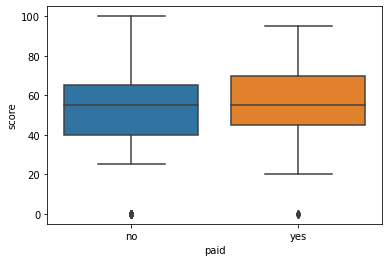

In [270]:
print(stud.groupby(['paid'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="paid", y="score", 
            data=stud)

In [271]:
'''Видно что средние значения оценки за экзамен учеников обоих выборок примерно равны, проверим это ститистичиски
   т.к. дисперсии в обоих выборка различны, то примении тест Манна-Уитни  
'''

test_means('paid', ['no', 'yes'])

Statistics=16869.500, p=0.122
Такое же распределение (нельзя отклонить H0)


In [ ]:
'''удалим признак'''
stud.drop(['paid'], inplace = True, axis = 1)

# 19 activities
— дополнительные внеучебные занятия (yes или no)

In [274]:
stud.activities.value_counts(dropna=False)

yes    194
no     182
NaN     14
Name: activities, dtype: int64

In [ ]:
'''номинальный бинарный признак, есть пропущенные значения, их можно заменить модой'''

In [275]:
stud.activities.fillna(stud.activities.mode()[0], inplace=True)

            median       mean  count        std         var
activities                                                 
no            55.0  52.307692    182  22.296442  497.131322
yes           55.0  52.187500    208  23.201458  538.307669


<AxesSubplot:xlabel='activities', ylabel='score'>

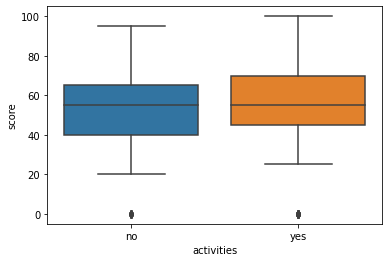

In [276]:
print(stud.groupby(['activities'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="activities", y="score", 
            data=stud)

In [277]:
'''
   Видно что средние значения оценки за экзамен учеников обоих выборок примерно равны, проверим это ститистичиски
   т.к. дисперсии в обоих выборка различны, то примении тест Манна-Уитни 
'''
test_means('activities', ['yes', 'no'])

Statistics=18764.000, p=0.441
Такое же распределение (нельзя отклонить H0)


In [278]:
'''удалим признак'''
stud.drop(['activities'], inplace = True, axis = 1)

# 20 nursery
— посещал детский сад (yes или no)

In [279]:
stud.nursery.value_counts(dropna=False)

yes    298
no      76
NaN     16
Name: nursery, dtype: int64

In [ ]:
'''номинальный бинарный признак, есть пропущенные значения, их можно заменить модой'''

In [280]:
stud.nursery.fillna(stud.nursery.mode()[0], inplace=True)

         median       mean  count        std         var
nursery                                                 
no         55.0  50.131579     76  22.375190  500.649123
yes        55.0  52.754777    314  22.851243  522.179290


<AxesSubplot:xlabel='nursery', ylabel='score'>

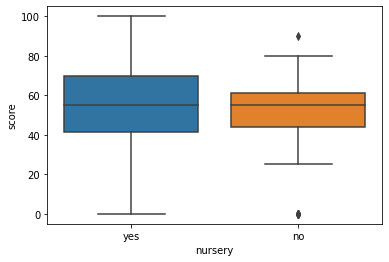

In [281]:
print(stud.groupby(['nursery'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="nursery", y="score", 
            data=stud)

In [282]:
'''
   Видно что средние значения оценки за экзамен учеников обоих выборок примерно равны, проверим это ститистичиски
   т.к. дисперсии в обоих выборка различны, то примении тест Манна-Уитни 
'''
test_means('nursery', ['yes', 'no'])

Statistics=11455.500, p=0.294
Такое же распределение (нельзя отклонить H0)


In [283]:
'''удалим признак'''
stud.drop(['nursery'], inplace = True, axis = 1)

# 21 higher
— хочет получить высшее образование (yes или no)

In [284]:
stud.higher.value_counts(dropna=False)

yes    353
NaN     19
no      18
Name: higher, dtype: int64

In [ ]:
'''номинальный бинарный признак, есть пропущенные значения, их можно заменить модой'''

In [285]:
stud.higher.fillna(stud.higher.mode()[0], inplace=True)

        median       mean  count        std         var
higher                                                 
no        42.5  33.333333     18  25.437351  647.058824
yes       55.0  53.158602    372  22.249725  495.050249


<AxesSubplot:xlabel='higher', ylabel='score'>

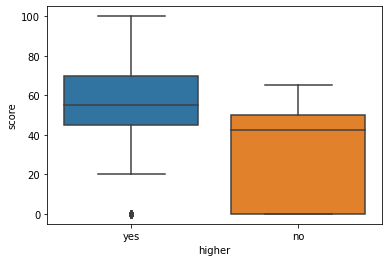

In [286]:
print(stud.groupby(['higher'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="higher", y="score", 
            data=stud)

In [ ]:
'''
   На графике видно что те кто не хочет получать высшее образованее чаще получают плохие оценки

'''

# 22 internet
— наличие интернета дома (yes или no)

In [287]:
stud.internet.value_counts(dropna=False)

yes    303
no      53
NaN     34
Name: internet, dtype: int64

In [ ]:
'''номинальный бинарный признак, есть пропущенные значения, их можно заменить модой'''

In [288]:
stud.internet.fillna(stud.internet.mode()[0], inplace=True)

          median       mean  count        std         var
internet                                                 
no          50.0  48.773585     53  21.637433  468.178520
yes         55.0  52.789318    337  22.908205  524.785838


<AxesSubplot:xlabel='internet', ylabel='score'>

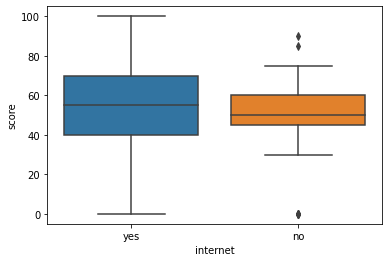

In [289]:
print(stud.groupby(['internet'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="internet", y="score", 
            data=stud)

In [ ]:
'''
   Видно что средние значения оценки за экзамен учеников обоих выборок примерно равны, проверим это ститистичиски
   т.к. дисперсии в обоих выборка различны, то примении тест Манна-Уитни 
'''


In [290]:
'''удалим признак'''
stud.drop(['internet'], inplace = True, axis = 1)

# 23 romantic
— в романтических отношениях (yes или no)

In [291]:
stud.romantic.value_counts(dropna=False)

no     237
yes    122
NaN     31
Name: romantic, dtype: int64

In [ ]:
'''номинальный бинарный признак, есть пропущенные значения, их можно заменить модой'''

In [292]:
stud.romantic.fillna(stud.romantic.mode()[0], inplace=True)

          median       mean  count        std         var
romantic                                                 
no          55.0  54.365672    268  21.610457  467.011851
yes         55.0  47.581967    122  24.539003  602.162647


<AxesSubplot:xlabel='romantic', ylabel='score'>

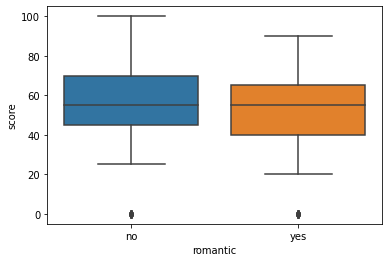

In [293]:
print(stud.groupby(['romantic'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="romantic", y="score", 
            data=stud)

In [294]:
'''
   Убедимся что выборки ститистичиски различаются т.к. дисперсии в обоих выборка различны, 
   то примении тест Манна-Уитни 
'''
test_means('romantic', ['yes', 'no'])

Statistics=14294.000, p=0.023
Различное распределение (отклонить H0)


# 24 famrel
— семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [295]:
stud.famrel.value_counts(dropna=False)

 4.0    182
 5.0     94
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [ ]:
'''
    Категориальный признак, в данных по этому признаку есть пропущенные значения, а также одно значение с ошибкой
    "-1", его можно заменить на "1", по здравому смыслу. Остальные заменим модой
'''

In [296]:
stud.famrel[stud.famrel == -1] = 1
stud.famrel.fillna(stud.famrel.mode()[0], inplace=True)

<ipython-input-296-67106fe0b030>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.famrel[stud.famrel == -1] = 1


In [297]:
stud.famrel.value_counts(dropna=False)

4.0    209
5.0     94
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

        median       mean  count        std         var
famrel                                                 
1.0       60.0  53.125000      8  24.192310  585.267857
2.0       55.0  48.529412     17  28.326484  802.389706
3.0       55.0  51.451613     62  22.713235  515.891063
4.0       55.0  51.602871    209  21.886732  479.029030
5.0       55.0  54.787234     94  23.735945  563.395104


<AxesSubplot:xlabel='famrel', ylabel='score'>

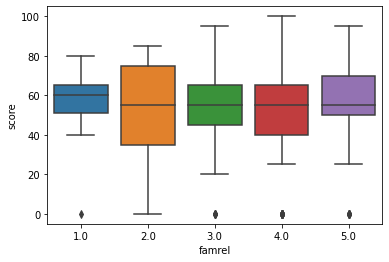

In [298]:
print(stud.groupby(['famrel'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="famrel", y="score", 
            data=stud)

# 25 freetime
— свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [299]:
stud.freetime.value_counts(dropna=False)

3.0    153
4.0    110
2.0     63
5.0     35
1.0     18
NaN     11
Name: freetime, dtype: int64

In [ ]:
'''
    Категориальный признак, есть пропущенные значения, заменим модой
'''

In [300]:
stud.freetime.fillna(stud.freetime.mode()[0], inplace=True)

          median       mean  count        std         var
freetime                                                 
1.0         50.0  48.333333     18  24.131990  582.352941
2.0         60.0  57.539683     63  21.153681  447.478239
3.0         52.5  49.542683    164  23.749808  564.053382
4.0         55.0  52.590909    110  21.361156  456.298999
5.0         60.0  56.285714     35  23.179062  537.268908


<AxesSubplot:xlabel='freetime', ylabel='score'>

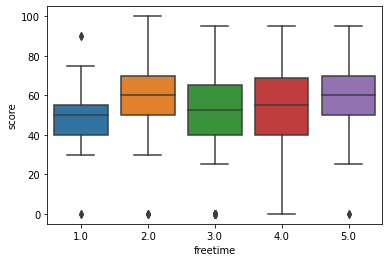

In [301]:
print(stud.groupby(['freetime'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="freetime", y="score", 
            data=stud)

In [ ]:
'''
   похоже отсутсвие свободного времени после школы не способствует получению хорших оценок
'''

# 26 goout
— проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [302]:
stud.goout.value_counts(dropna=False)

3.0    124
2.0    101
4.0     83
5.0     51
1.0     23
NaN      8
Name: goout, dtype: int64

In [ ]:
'''
    Категориальный признак, есть пропущенные значения, заменим модой
'''

In [303]:
stud.goout.fillna(stud.goout.mode()[0], inplace=True)

       median       mean  count        std         var
goout                                                 
1.0      55.0  49.347826     23  26.684365  712.055336
2.0      60.0  55.990099    101  22.902181  524.509901
3.0      55.0  54.318182    132  21.175140  448.386537
4.0      50.0  49.759036     83  21.168655  448.111960
5.0      50.0  44.803922     51  25.415759  645.960784


<AxesSubplot:xlabel='goout', ylabel='score'>

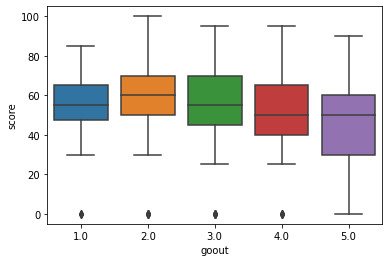

In [304]:
print(stud.groupby(['goout'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="goout", y="score", 
            data=stud)

In [ ]:
'''
   в среднем бал ниже у тех кто много времени проводит с друзьями (дружба - это вредно)
'''

# 27 health
— текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [305]:
stud.health.value_counts(dropna=False)

5.0    137
3.0     87
4.0     62
1.0     46
2.0     43
NaN     15
Name: health, dtype: int64

In [ ]:
'''
    Категориальный признак, есть пропущенные значения, заменим модой
'''

In [306]:
stud.health.fillna(stud.health.mode()[0], inplace=True)

        median       mean  count        std         var
health                                                 
1.0       65.0  59.782609     46  21.806129  475.507246
2.0       55.0  52.674419     43  26.911425  724.224806
3.0       55.0  50.574713     87  20.465872  418.851911
4.0       52.5  51.129032     62  24.148098  583.130619
5.0       55.0  51.250000    152  22.273511  496.109272


<AxesSubplot:xlabel='health', ylabel='score'>

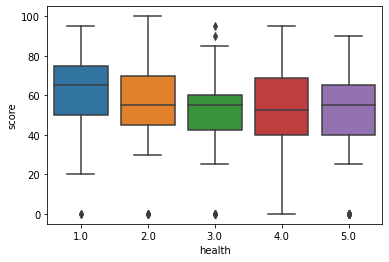

In [307]:
print(stud.groupby(['health'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="health", y="score", 
            data=stud)

In [ ]:
'''
   Видимо в этих 2-х школах очень сложно учиться и в среднем высокий бал по математике даётся ценой здоровья
'''

# 28 absences
— количество пропущенных занятий

<AxesSubplot:>

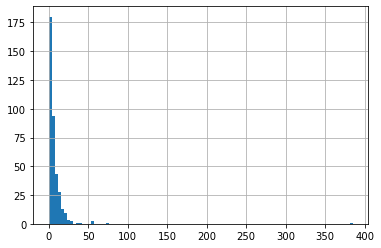

In [309]:
stud.absences.hist(bins=100)

In [ ]:
'''
   График распределения не семетричный большинство учеников не пропускают занятия, есть выбросы, 
   некоторые полученны из-за ошибки заполенения так как привышают количество учебных дней в году.
   Эти данные можно отнести к пропущенным значениям и вместе с ними заменить медианой
'''

In [310]:
stud.absences = stud.absences.apply(lambda x: np.NaN if x > 211 else x) # сначала заменю выбросы на NaN чтобы они не влияли на значение среднего
stud.absences.fillna(stud.absences.median(), inplace=True)

In [311]:
stud.absences.value_counts(dropna=False)

0.0     110
4.0      65
2.0      60
6.0      31
8.0      21
10.0     17
14.0     12
12.0     12
3.0       7
16.0      6
7.0       6
5.0       5
18.0      5
20.0      4
1.0       3
22.0      3
9.0       3
15.0      2
13.0      2
11.0      2
54.0      1
25.0      1
17.0      1
26.0      1
56.0      1
23.0      1
28.0      1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
24.0      1
Name: absences, dtype: int64

<AxesSubplot:>

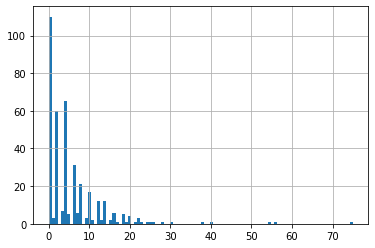

In [312]:
stud.absences.hist(bins=100)

# studytime, granular
признак в датасете без пояснения

In [313]:
'''
   Посмотрим на значения которые принимает этот признак
'''
stud['studytime, granular'].value_counts(dropna=False)

-6.0     193
-3.0     100
-9.0      63
-12.0     27
 NaN       7
Name: studytime, granular, dtype: int64

                     median       mean  count        std         var
studytime, granular                                                 
-12.0                  60.0  56.296296     27  26.406315  697.293447
-9.0                   55.0  57.460317     63  22.286134  496.671787
-6.0                   55.0  50.958549    193  21.310902  454.154523
-3.0                   50.0  49.300000    100  24.350347  592.939394


<AxesSubplot:xlabel='studytime, granular', ylabel='score'>

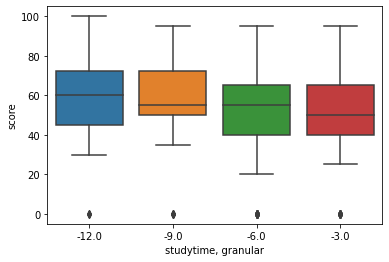

In [314]:
print(stud.groupby(['studytime, granular'])['score'].agg(['median', 'mean', 'count', 'std', 'var']))
sns.boxplot(x="studytime, granular", y="score", 
            data=stud)

In [ ]:
'''Так как про это признак ничего не известно, средние примерно равны и есть признак studytime, я решил удалить 
   этот признак 
'''

In [315]:
stud.drop(['studytime, granular'], inplace = True, axis = 1)

# Проведём корреляционный анализ числовых признаков

In [316]:
stud[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.168651,-0.166054
absences,0.168651,1.000000,0.032635
score,-0.166054,0.032635,1.000000


In [ ]:
'''
   Признаки 'age', 'absences' между собой слабо скоррелированы обе переменные оставляем в датасете для будущей модели
   Признак 'score' имеет отрицательный коэффициент корреляции с 'age', возможно у старших возрастов программ становится
   сложнее и получить высокий бал на экзамене по математике сложнее, но возможно это влияние других критериев которые
   связаны с возрастом.
'''

In [317]:
stud.head()

,sex,age,address,Medu,Fedu,Mjob,guardian,traveltime,studytime,failures,schoolsup,higher,romantic,famrel,freetime,goout,health,absences,score,F_isteacher
0,F,18,U,4.0,4.0,at_home,mother,2.0,2.0,0.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0,1
1,F,17,U,1.0,1.0,at_home,father,1.0,2.0,0.0,no,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,0
2,F,15,U,1.0,1.0,at_home,mother,1.0,2.0,3.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0,0
3,F,15,U,4.0,2.0,health,mother,1.0,3.0,0.0,no,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,0
4,F,16,U,3.0,3.0,other,father,1.0,2.0,0.0,no,yes,no,4.0,3.0,2.0,5.0,4.0,50.0,0


# Выводы
Я россмотрел каждый признак, восстановил пропущенные значения, убрал выбросы - по признаку возраст > 20, так как таких учеников всего 5 человек. Также я удалил те признаки распределения оценок для которых были статистически равны для всех значений признака.

В итоге в датасете осталось 390 объектов, 19 признаков, из них 18 из первоначального датасета и 1 я создал на основе существующего признака:

Числовые:
age, absences

Номинативные:
sex, address, Mjob, guardian, schoolsup, higher, romantic, F_isteacher(говый признак)

Котегориальные:
Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, health,
